In [1]:
# Load packages
import os
import sys
import itertools
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import manifold
import matplotlib.pyplot as plt

In [3]:
# Load some digits data
digits = datasets.load_digits(n_class=10)
x, y = digits.data, digits.target

print(x.shape, y.shape)

(1797, 64) (1797,)


In [4]:
print(x[0], y[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] 0


In [5]:
# Initiate k-means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit on train data
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [6]:
# Labels associated to cluster
np.unique(kmeans.labels_)

array([0, 1], dtype=int32)

In [7]:
# Get prediction on train data
predictions = kmeans.predict(x)

print(x.shape, predictions.shape)

(1797, 64) (1797,)


In [8]:
# View
predictions

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [9]:
# Perform dimentionality reduction and take only 2 componets for visualization
tsne = manifold.TSNE(n_components=2, init="pca", random_state=2019)

# Fit on train data
x_tsne = tsne.fit_transform(x)

print(x_tsne.shape)

(1797, 2)


In [10]:
# View
x_tsne

array([[ -3.766649 ,  57.240562 ],
       [ 29.003862 , -16.139313 ],
       [ 19.134077 ,  -7.349566 ],
       ...,
       [ 11.08747  , -12.88418  ],
       [-17.804667 ,  27.198317 ],
       [  6.9697943,  -8.962728 ]], dtype=float32)

In [11]:
# Cluster the dimentionally reduced clusters
kmeans2 = KMeans(n_clusters=2, random_state=0)

# Fit on the clusters
kmeans2.fit(x_tsne)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [12]:
# Get prediction on train data
predictions2 = kmeans2.predict(x_tsne)

print(x_tsne.shape, predictions2.shape)

(1797, 2) (1797,)


In [13]:
# View
predictions2

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

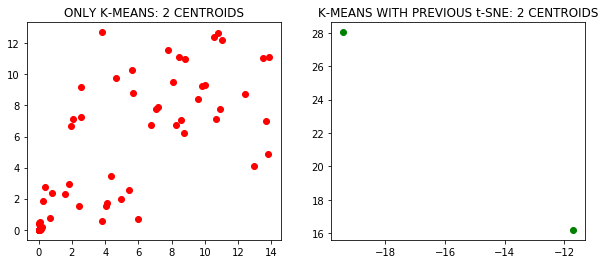

In [14]:
# Plot clusters
fig = plt.figure(figsize=(10,4))

# Figure 1
plt.subplot2grid((1,2), (0,0))
plt.title("ONLY K-MEANS: 2 CENTROIDS")
plt.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1], color="red")

# Figure 2
plt.subplot2grid((1,2), (0,1))
plt.title("K-MEANS WITH PREVIOUS t-SNE: 2 CENTROIDS")
plt.scatter(kmeans2.cluster_centers_[0], kmeans2.cluster_centers_[1],color="green")

plt.show()